In [12]:
import requests
from bs4 import BeautifulSoup
url="https://quotes.toscrape.com/js/"
response=requests.get(url)
# soup=Bea
print(response.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    
<script src="/static/jquery.js"></script>
<script>
    var data = [
    {
        "tags": [
            "change",
            "deep-thoughts",
            "thinking",
            "world"
        ],
        "author": {
            "name": "Albert Einstein",
            "goodreads_link": "/author/show/9810.Albert_Einstein",


In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://quotes.toscrape.com/js/page/2/')

from selenium.webdriver.common.by import By
all_quotes=[]
while True:

    quotes=driver.find_elements(By.CLASS_NAME,'text')
    for q in quotes:
        all_quotes.append(q.text)
    try:
        next_button=driver.find_element(By.CSS_SELECTOR,'li.next a')
        next_button.click()

    except:
        break
driver.quit()
df=pd.DataFrame(all_quotes, columns=['quotes'])
df.to_csv('quotes.csv',index=False)
print("Saved", len(all_quotes), "quotes to quotes.csv")

Saved 90 quotes to quotes.csv


In [57]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://quotes.toscrape.com/js/')

all_data = []

for page in range(5):
    quotes = driver.find_elements(By.CLASS_NAME, 'quote')

    for q in quotes:
        text = q.find_element(By.CLASS_NAME, 'text').text
        author = q.find_element(By.CLASS_NAME, 'author').text
        tags=q.find_element(By.CLASS_NAME,'tags').text

        all_data.append((text,author,tags))

    try:
        next_button = driver.find_element(By.CSS_SELECTOR, 'li.next a')
        next_button.click()
    except:
        break

driver.quit()

df = pd.DataFrame(all_data,columns=["quote","author","tags"])
df.to_csv('quotes_raw.csv', index=False)



In [58]:
df=pd.read_csv(r"C:\Users\NOOR AL MUSABAH\quotes_raw.csv")
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   50 non-null     object
 1   author  50 non-null     object
 2   tags    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


np.int64(0)

In [63]:
# df["quote"]=df["quote"].str.strip()
# df["author"]=df["author"].str.strip()
# df["tags"]=df["tags"].str.strip()
# df["tags"] = df["tags"].str.replace("tags:", "").str.split().str.join(",")
# df
df.columns=df.columns.str.strip()
df['tags']=df['tags'].str.replace("Tags:","").str.split().str.join(",")

df.to_csv("quotes_cleaned.csv",index=False)
df

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change,deep-thoughts,thinking,world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities,choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational,life,live,miracle,miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy,books,classic,humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself,inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood,success,value"
6,“It is better to be hated for what you are tha...,André Gide,"life,love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison,failure,inspirational,paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor,obvious,simile"


In [62]:
df.isnull().sum()

quote     0
author    0
tags      0
dtype: int64

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
no_of_quotes=len(df)
unique_authors = df["author"].nunique()
no_of_quotes
unique_authors

top_tags=df["tags"].value_counts().head(10)
top_tags
# sns.barplot(data=df,x="unique_authors",y="top_authors")

tags
love                                          3
attributed-no-source                          2
                                              2
dumbledore                                    2
misattributed-to-mother-teresa,paraphrased    1
comedy,life,yourself                          1
children,fairy-tales                          1
imagination                                   1
music                                         1
learning,reading,seuss                        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Top five Authors by number of Quotes')

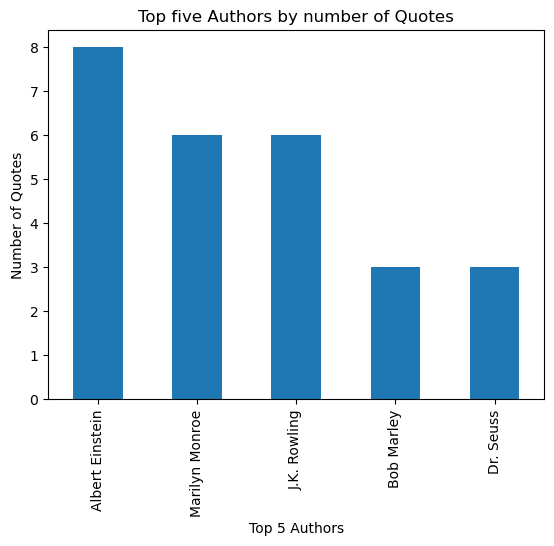

In [79]:
top_authors = df["author"].value_counts().head()
top_authors
top_authors.plot(kind='bar')
plt.xlabel("Top 5 Authors")
plt.ylabel("Number of Quotes")
plt.title("Top five Authors by number of Quotes")

In [87]:
common_tags = df["tags"].value_counts().head(10)
common_tags

tags
love                                          3
attributed-no-source                          2
                                              2
dumbledore                                    2
misattributed-to-mother-teresa,paraphrased    1
comedy,life,yourself                          1
children,fairy-tales                          1
imagination                                   1
music                                         1
learning,reading,seuss                        1
Name: count, dtype: int64

Text(0.5, 1.0, 'frequency ditribution of tags')

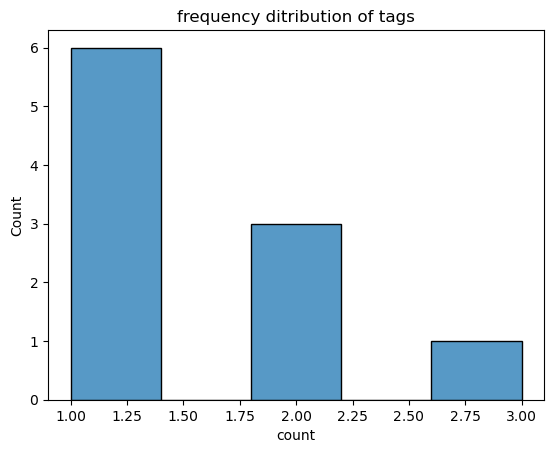

In [92]:
import seaborn as sns
sns.histplot(common_tags)
plt.title("frequency ditribution of tags")



<Axes: xlabel='tags'>

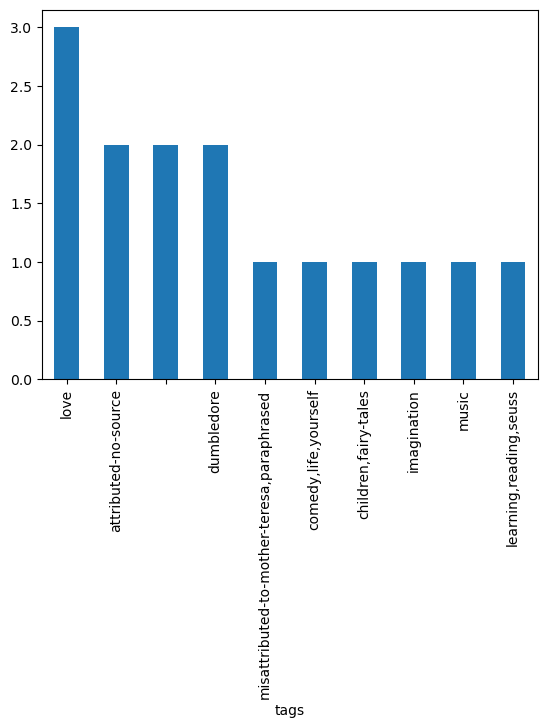

In [93]:
common_tags.plot(kind='bar')

<Axes: xlabel='length_quote', ylabel='Count'>

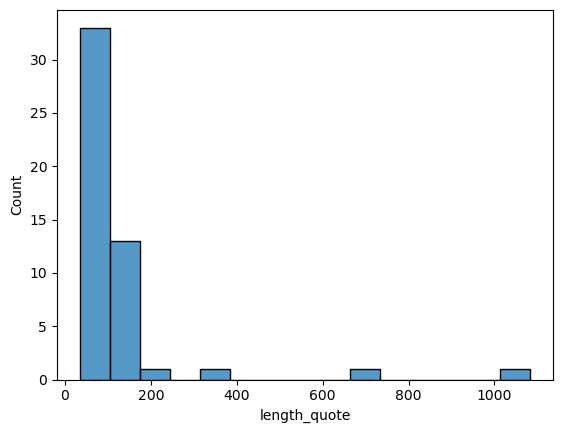

In [97]:
df["length_quote"] = df["quote"].str.len()
sns.histplot(df["length_quote"])

In [105]:
df=df.drop(columns="length_quote")

In [109]:
df.loc[df["quote_length"].idxmax()]

quote           “This life is what you make it. No matter what...
author                                             Marilyn Monroe
tags            friends,heartbreak,inspirational,life,love,sis...
quote_length                                                 1084
Name: 10, dtype: object

In [110]:
df.loc[df["quote_length"].idxmin()]

quote           “We read to know we're not alone.”
author                           William Nicholson
tags            misattributed-to-c-s-lewis,reading
quote_length                                    34
Name: 36, dtype: object

In [113]:
most_common_author = df["author"].value_counts().idxmax()
most_common_tag = df["tags"].value_counts().idxmax()
longest_author = df.loc[df["quote_length"].idxmax(), "author"]

insight_text = f"""
INSIGHTS

Most frequent author: {most_common_author}

Most common tag/theme: {most_common_tag}

Longer quotes tend to appear from: {longest_author}

Tagging pattern:
Many quotes share motivational and life-related themes.

Business use-case:
This dataset can be used to build a quote recommendation system based on preferred themes (tags).
"""

with open("insights.txt", "w") as file:
    file.write(insight_text)
print(insight_text)


INSIGHTS

Most frequent author: Albert Einstein

Most common tag/theme: love

Longer quotes tend to appear from: Marilyn Monroe

Tagging pattern:
Many quotes share motivational and life-related themes.

Business use-case:
This dataset can be used to build a quote recommendation system based on preferred themes (tags).

